In [43]:
import pandas as pd
%matplotlib inline
import os

In [44]:
pwd = os.getcwd()

In [45]:
mb = pd.read_csv(pwd + '/Data - Map Banned.csv', usecols=['Map','Total']).iloc[1:]
mp = pd.read_csv(pwd + '/Data - Map Picked.csv', usecols=['Map','Total'])
ss = pd.read_csv(pwd + '/Data - Side Statistics.csv')


In [46]:
mb

,Map,Total
1,Ascent,18
2,Bind,15
3,Fracture,29
4,Haven,22
5,Lotus,18
6,Pearl,18
7,Split,12


In [47]:
mp

,Map,Total
0,Ascent,16
1,Bind,19
2,Fracture,5
3,Haven,12
4,Lotus,16
5,Pearl,16
6,Split,22


In [48]:
ss

,Map,Atk Wins,Def Wins
0,Ascent,145,138
1,Bind,157,183
2,Fracture,51,53
3,Haven,107,109
4,Lotus,151,123
5,Pearl,149,151
6,Split,178,138


In [49]:
map_data = pd.merge(mp,mb, on='Map')
map_data = pd.merge(map_data,ss, on='Map')
map_data

,Map,Total_x,Total_y,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [50]:
map_data=map_data.rename(columns={'Total_x': 'Picked','Total_y':'Banned'})
map_data

,Map,Picked,Banned,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [51]:
map_data.describe()

,Picked,Banned,Atk Wins,Def Wins
count,7.000000,7.000000,7.000000,7.000000
mean,15.142857,18.857143,134.000000,127.857143
std,5.429198,5.429198,42.265037,40.341990
min,5.000000,12.000000,51.000000,53.000000
25%,14.000000,16.500000,126.000000,116.000000
50%,16.000000,18.000000,149.000000,138.000000
75%,17.500000,20.000000,154.000000,144.500000
max,22.000000,29.000000,178.000000,183.000000


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


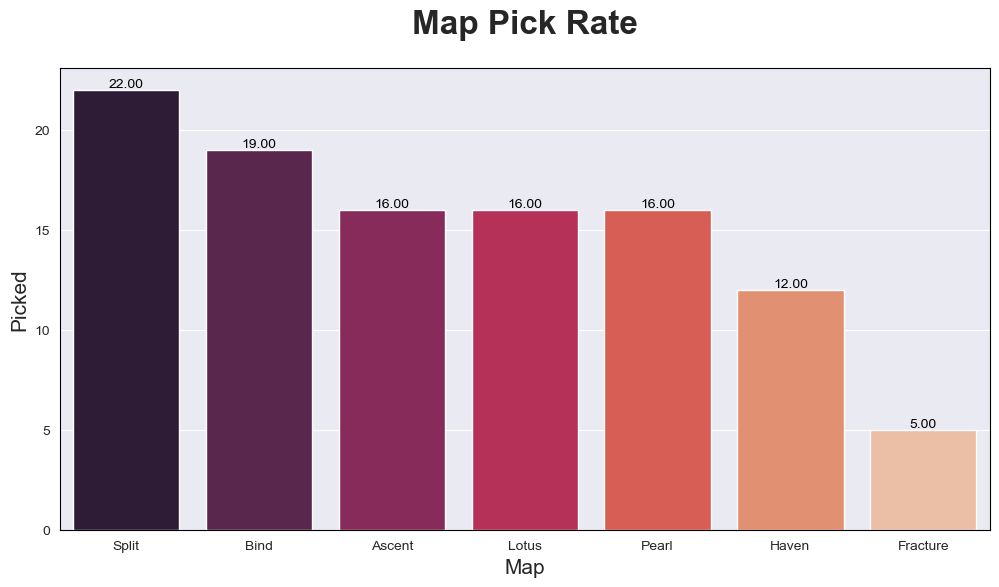

        Map  Picked
0     Split      22
1      Bind      19
2    Ascent      16
3     Lotus      16
4     Pearl      16
5     Haven      12
6  Fracture       5


In [53]:
plt.figure(figsize=(12,6))

custom = {"axes.edgecolor": "BLACK",}
sns.set_style('darkgrid',custom)
ax =  sns.barplot(data= map_data.sort_values(by='Picked',ascending=False),
            x='Map',y='Picked', width=.8, palette= 'rocket')


plt.title('Map Pick Rate', pad=25, weight= 'bold', fontsize= 24)
plt.xlabel('Map', size=15)
plt.ylabel('Picked', size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='black')

plt.savefig('map picked.jpg')
plt.show()
picked_map = (map_data[['Map','Picked']].sort_values(by='Picked', 
                        ascending=False).reset_index(drop=True))

print(picked_map)

/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


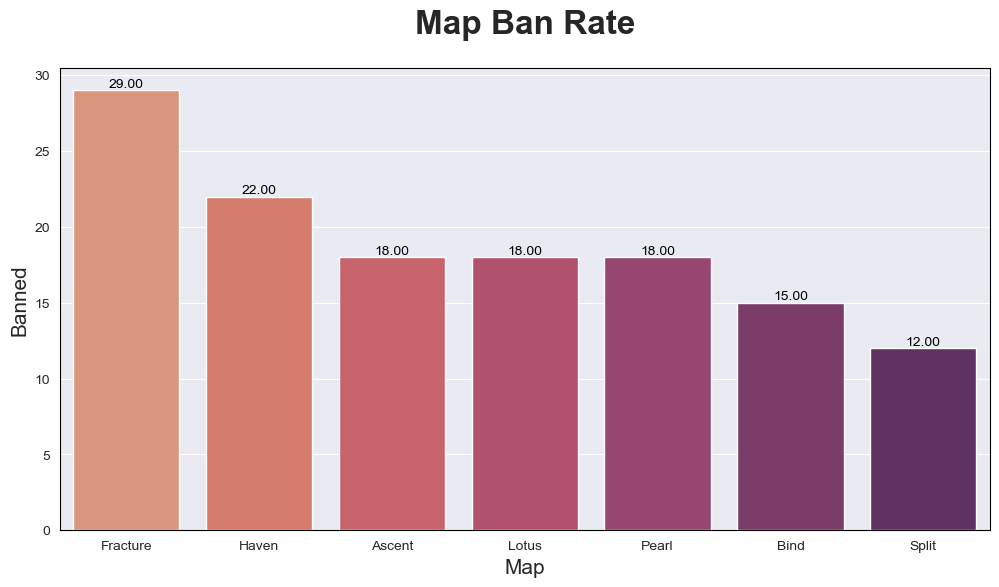

        Map  Banned
0  Fracture      29
1     Haven      22
2    Ascent      18
3     Lotus      18
4     Pearl      18
5      Bind      15
6     Split      12


In [54]:
plt.figure(figsize=(12,6))
custom = {"axes.edgecolor": "BLACK",}
sns.set_style('darkgrid',custom)
ax = sns.barplot(data= map_data.sort_values(by='Banned', ascending=False),
            x='Map',y='Banned', width=.8, palette= 'flare')


plt.title('Map Ban Rate', pad=25, weight= 'bold', fontsize= 24)
plt.xlabel('Map', size=15)
plt.ylabel('Banned', size=15)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', color='black')

plt.savefig('map banned.jpg')                                                
plt.show()
banned_map = (map_data[['Map','Banned']].sort_values(by='Banned', 
                        ascending=False).reset_index(drop=True))

print(banned_map)

In [55]:
ss

,Map,Atk Wins,Def Wins
0,Ascent,145,138
1,Bind,157,183
2,Fracture,51,53
3,Haven,107,109
4,Lotus,151,123
5,Pearl,149,151
6,Split,178,138


/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

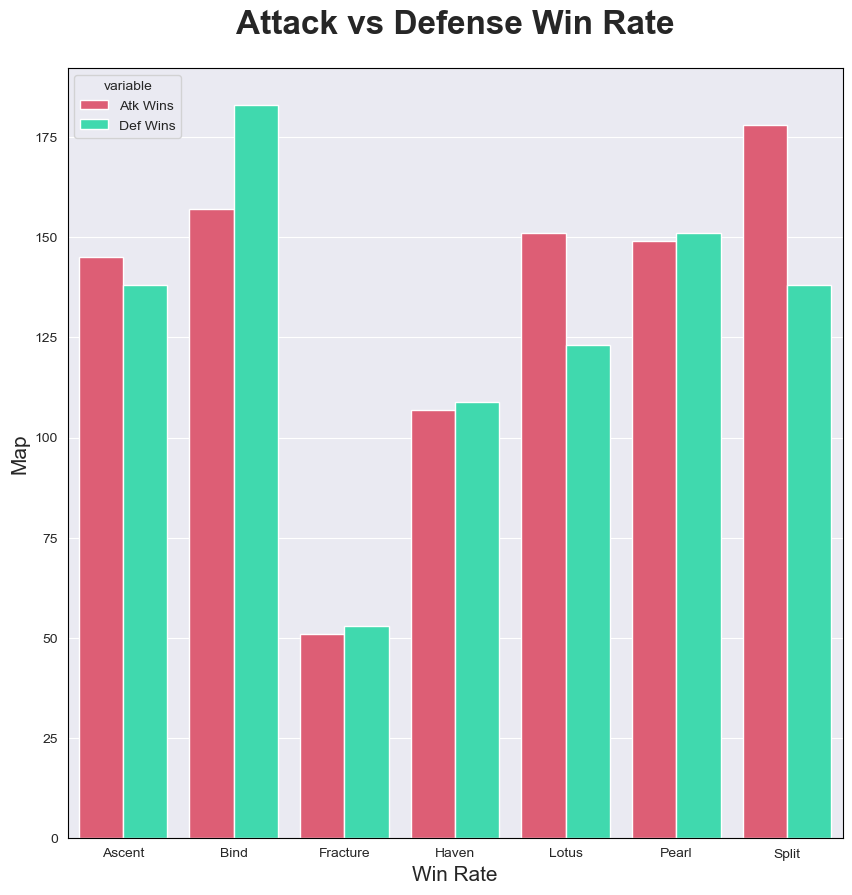

In [56]:
ss_melt = ss.melt(id_vars=['Map'], value_vars=['Atk Wins', 'Def Wins'])

plt.figure(figsize=(10,10))
custom = {"axes.edgecolor": "BLACK",}
sns.set_style('darkgrid',custom)
color_to_add=['#F24968','#27F2B9']
ax = sns.barplot(data=ss_melt, x='Map', y='value', hue='variable', width=.8, errorbar="sd", 
                 palette=color_to_add)


plt.title('Attack vs Defense Win Rate', pad=25, weight= 'bold', fontsize= 24)
plt.xlabel('Win Rate', size=15,)
plt.ylabel('Map', size=15)


plt.savefig('win rate.jpg')                                                
plt.show()

In [57]:
ps = pd.read_csv(pwd + '/Edited Data - Player Statistics.csv')
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,NaN
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,NaN
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,NaN


make a new list where we keep the best players based on ACS then kills then assist

create a radar chart for the best and the worst platers according to the above code  mayble or just compare the first 5 and last 5

find who the most used agents where for the whole tournament

In [58]:
ps['Maps'].describe()

count    80.00000
mean     10.50000
std       6.16236
min       4.00000
25%       5.50000
50%       9.00000
75%      14.50000
max      24.00000
Name: Maps, dtype: float64

In [59]:
# 50 % of the people have played at least 9 maps
condition_value = 14
ps2 = ps.sort_values(by='KD', ascending=False)
ps3 = ps2[ps2['Maps'] >= condition_value]
ps3.head(10)

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
6,Alfajer,Turkey,Fnatic,14,233,168,36,1.38,1.60,232,16.6,12.0,2.5,Killjoy,Cypher,Chamber
28,Leo,Sweden,Fnatic,14,201,147,119,1.36,2.17,206,14.3,10.5,8.5,Sova,Skye,Fade
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
11,Less,Brazil,LOUD,24,416,344,100,1.20,1.50,227,17.3,14.3,4.1,Killjoy,Viper,NaN
18,Derke,Finland,Fnatic,14,206,180,44,1.14,1.38,218,14.7,12.8,3.1,Raze,Jett,NaN
37,C0M,United States,Evil Geniuses,21,330,294,144,1.12,1.61,195,15.7,14.0,6.8,Sova,Viper,NaN
19,Cauanzin,Brazil,LOUD,24,391,348,207,1.12,1.71,217,16.2,14.5,8.6,Skye,Fade,Sova
9,Jawgemo,Cambodia,Evil Geniuses,21,362,325,154,1.11,1.58,228,17.2,15.4,7.3,Raze,Omen,Astra
23,Something,Russia,Paper Rex,16,269,245,73,1.09,1.39,210,16.8,15.3,4.5,Jett,Reyna,Breach


/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


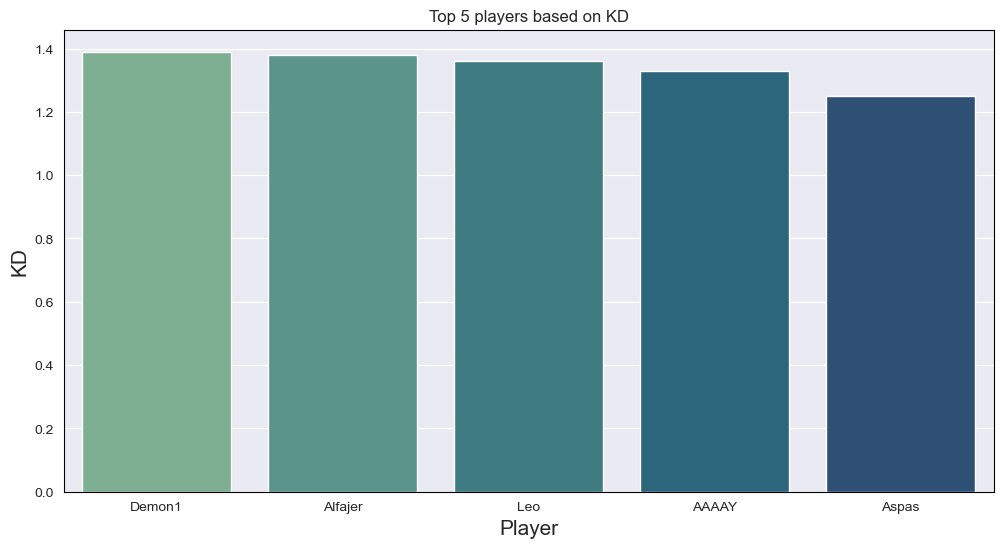

In [60]:
plt.figure(figsize= (12,6))

sns.barplot(data=ps.sort_values(by='KD', ascending=False).iloc[:5], x='Player', y='KD', palette='crest')

plt.title('Top 5 players based on KD')
plt.xlabel('Player', size=15,)
plt.ylabel('KD', size=15)

plt.savefig('Top 5 players on KD.jpg')
plt.show()

In [61]:
ps['A'].describe()

count     80.000000
mean      70.437500
std       57.389375
min        6.000000
25%       25.750000
50%       56.500000
75%       94.000000
max      265.000000
Name: A, dtype: float64

/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidantwi/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


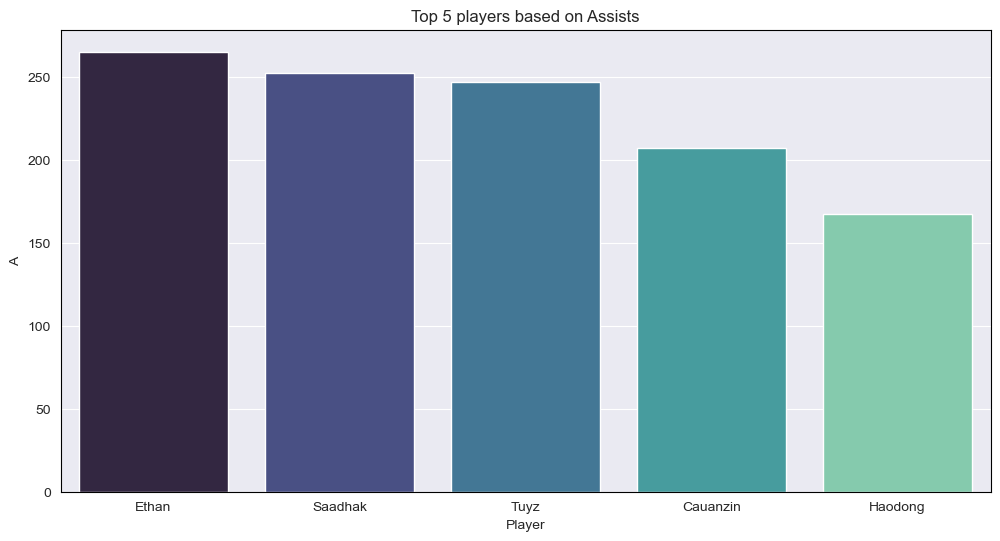

In [62]:
plt.figure(figsize= (12,6))
sns.barplot(data=ps.sort_values(by='A', ascending=False).iloc[:5], x='Player', y='A', palette= 'mako')

plt.title('Top 5 players based on Assists')

plt.savefig('Top 5 bassed on Assists.jpg')
plt.show()

In [63]:
ps.fillna(" ", inplace = True)
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,


In [64]:
ps2 = ps[['Agent 1', 'Agent 2', 'Agent 3']]
ps2

,Agent 1,Agent 2,Agent 3
0,Raze,Jett,
1,Raze,Jett,
2,Jett,Astra,Chamber
3,Raze,Jett,
4,Raze,Phoenix,
...,...,...,...
75,Omen,Killjoy,Brimstone
76,Astra,Viper,Harbor
77,Skye,Astra,
78,Brimstone,Astra,


In [65]:
agent_pick = ps2[['Agent 1', 'Agent 2', 'Agent 3']].stack().value_counts().reset_index().tail(-1)
ap = pd.DataFrame(agent_pick)


In [66]:
df_merged = ap.groupby(ap.index).sum()

# Print the merged DataFrame
print(df_merged)

         index  count
1      Killjoy     13
2         Raze     12
3         Skye     12
4        Viper     10
5         Omen     10
6       Breach      9
7         Sova      9
8      Killjoy      9
9        Viper      9
10        Jett      9
11        Jett      8
12       Astra      7
13   Brimstone      7
14     Chamber      7
15        Fade      7
16        Omen      6
17       KAY/O      6
18        Skye      6
19        Raze      5
20      Harbor      5
21   Brimstone      4
22       Astra      4
23      Breach      4
24      Cypher      3
25        Sova      3
26      Harbor      2
27      Cypher      2
28       Gekko      2
29        Yoru      2
30     Chamber      1
31        Sage      1
32       KAY/O      1
33       Reyna      1
34        Neon      1
35        Neon      1
36     Phoenix      1
37       Gekko      1
